In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-data-analysis/Sales Data.csv


In [2]:
# Load the data
data = pd.read_csv("/kaggle/input/sales-data-analysis/Sales Data.csv")
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Exploring the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   sales             185950 non-null  float64       
 8   city              185950 non-null  object        
 9   hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


# **Fields and Data Types 🗒️**  
Dataset containing sales transactions, including product details, order information, and customer metadata. The data consists of orders with details such as product names, quantities, prices, and purchase locations, along with additional metadata like order dates and sales calculations.  

## **Data Dictionary**  

| **Parameter**            | **Description**                                                                                                                                      |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| `id`                    | Unique identifier assigned to each row (auto-generated).                                                                                       |
| `order_id`              | Unique identifier for each order.                                                                                                              |
| `product`               | Name of the product ordered.                                                                                                                   |
| `quantity_ordered`      | Quantity of the product ordered in the transaction.                                                                                            |
| `price_each`            | Price of each unit of the product.                                                                                                             |
| `order_date`            | Timestamp of when the order was placed.                                                                                                        |
| `purchase_address`      | Address where the purchase was made, including street, city, and zip code.                                                                    |
| `month`                 | Month in which the order was placed (numeric value, e.g., 1 for January).                                                                     |
| `sales`                 | Total sales amount for the transaction, calculated as `quantity_ordered * price_each`.                                                        |
| `city`                  | City where the purchase was made.                                                                                                              |
| `hour`                  | Hour of the day when the order was placed (numeric value, 0-23).                                                                              |

---

### **Notes**:
- **`id`**: This column appears to be an auto-generated index and may not be necessary for analysis. Consider dropping it if not required.
- **`sales`**: This column is likely derived from `quantity_ordered` and `price_each`. Ensure its accuracy before analysis.
- **Geographic Data**: The `purchase_address` and `city` columns can be used for location-based analysis, such as identifying top-performing cities.


# Understanding Data

In [11]:
# Display the dimensions of the dataset
data.shape

(185950, 10)

In [12]:
# Display descriptive statistics of the dataset
data.describe()

,order_id,quantity_ordered,price_each,order_date,month,sales,hour
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416


In [13]:
# Display column names of the dataset
data.columns.values

array(['order_id', 'product', 'quantity_ordered', 'price_each',
       'order_date', 'purchase_address', 'month', 'sales', 'city', 'hour'],
      dtype=object)

In [7]:
# Renames the dataset and removes the space
data = data.rename(columns={
    "Unnamed: 0": "id",
    "Order ID": "order_id",
    "Product": "product",
    "Quantity Ordered": "quantity_ordered",
    "Price Each": "price_each",
    "Order Date": "order_date",
    "Purchase Address": "purchase_address",
    "Month": "month",
    "Sales": "sales",
    "City": "city",
    "Hour": "hour"
})

# Display the first few rows of the dataset to verify the changes
data.head()

,id,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [14]:
# Count the ocurrences of each Airline in the dataset
data.city.value_counts()

city
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64

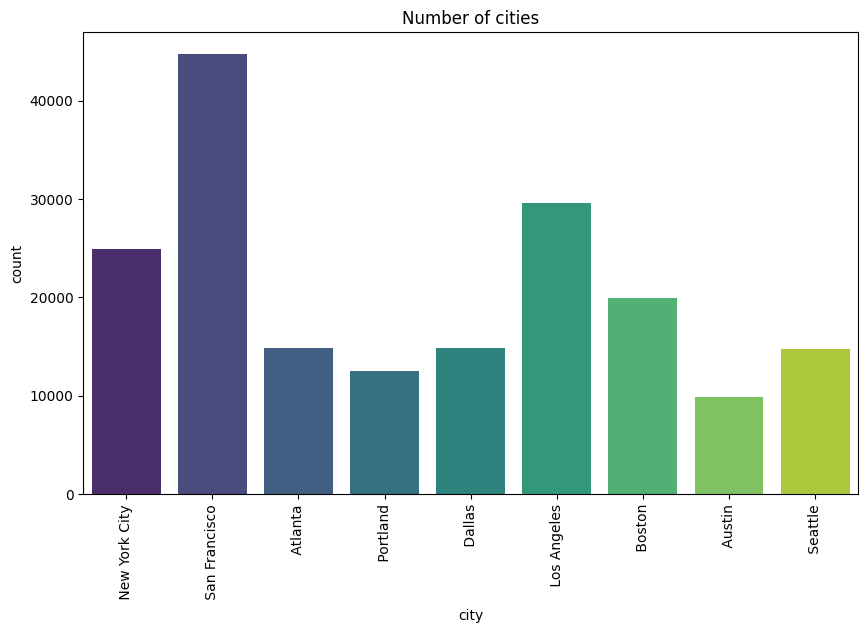

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='city',data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of cities")
plt.show()

## Now i going to checking the number of unique values in each column

In [4]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Unnamed: 0,25093
Order ID,178437
Product,19
Quantity Ordered,9
Price Each,17
Order Date,142395
Purchase Address,140787
Month,12
Sales,53
City,9


# Missing values

In [9]:
# Check for missing values
print(data.isnull().sum())

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
sales               0
city                0
hour                0
dtype: int64


# EDA (Exploratory Data Analysis)

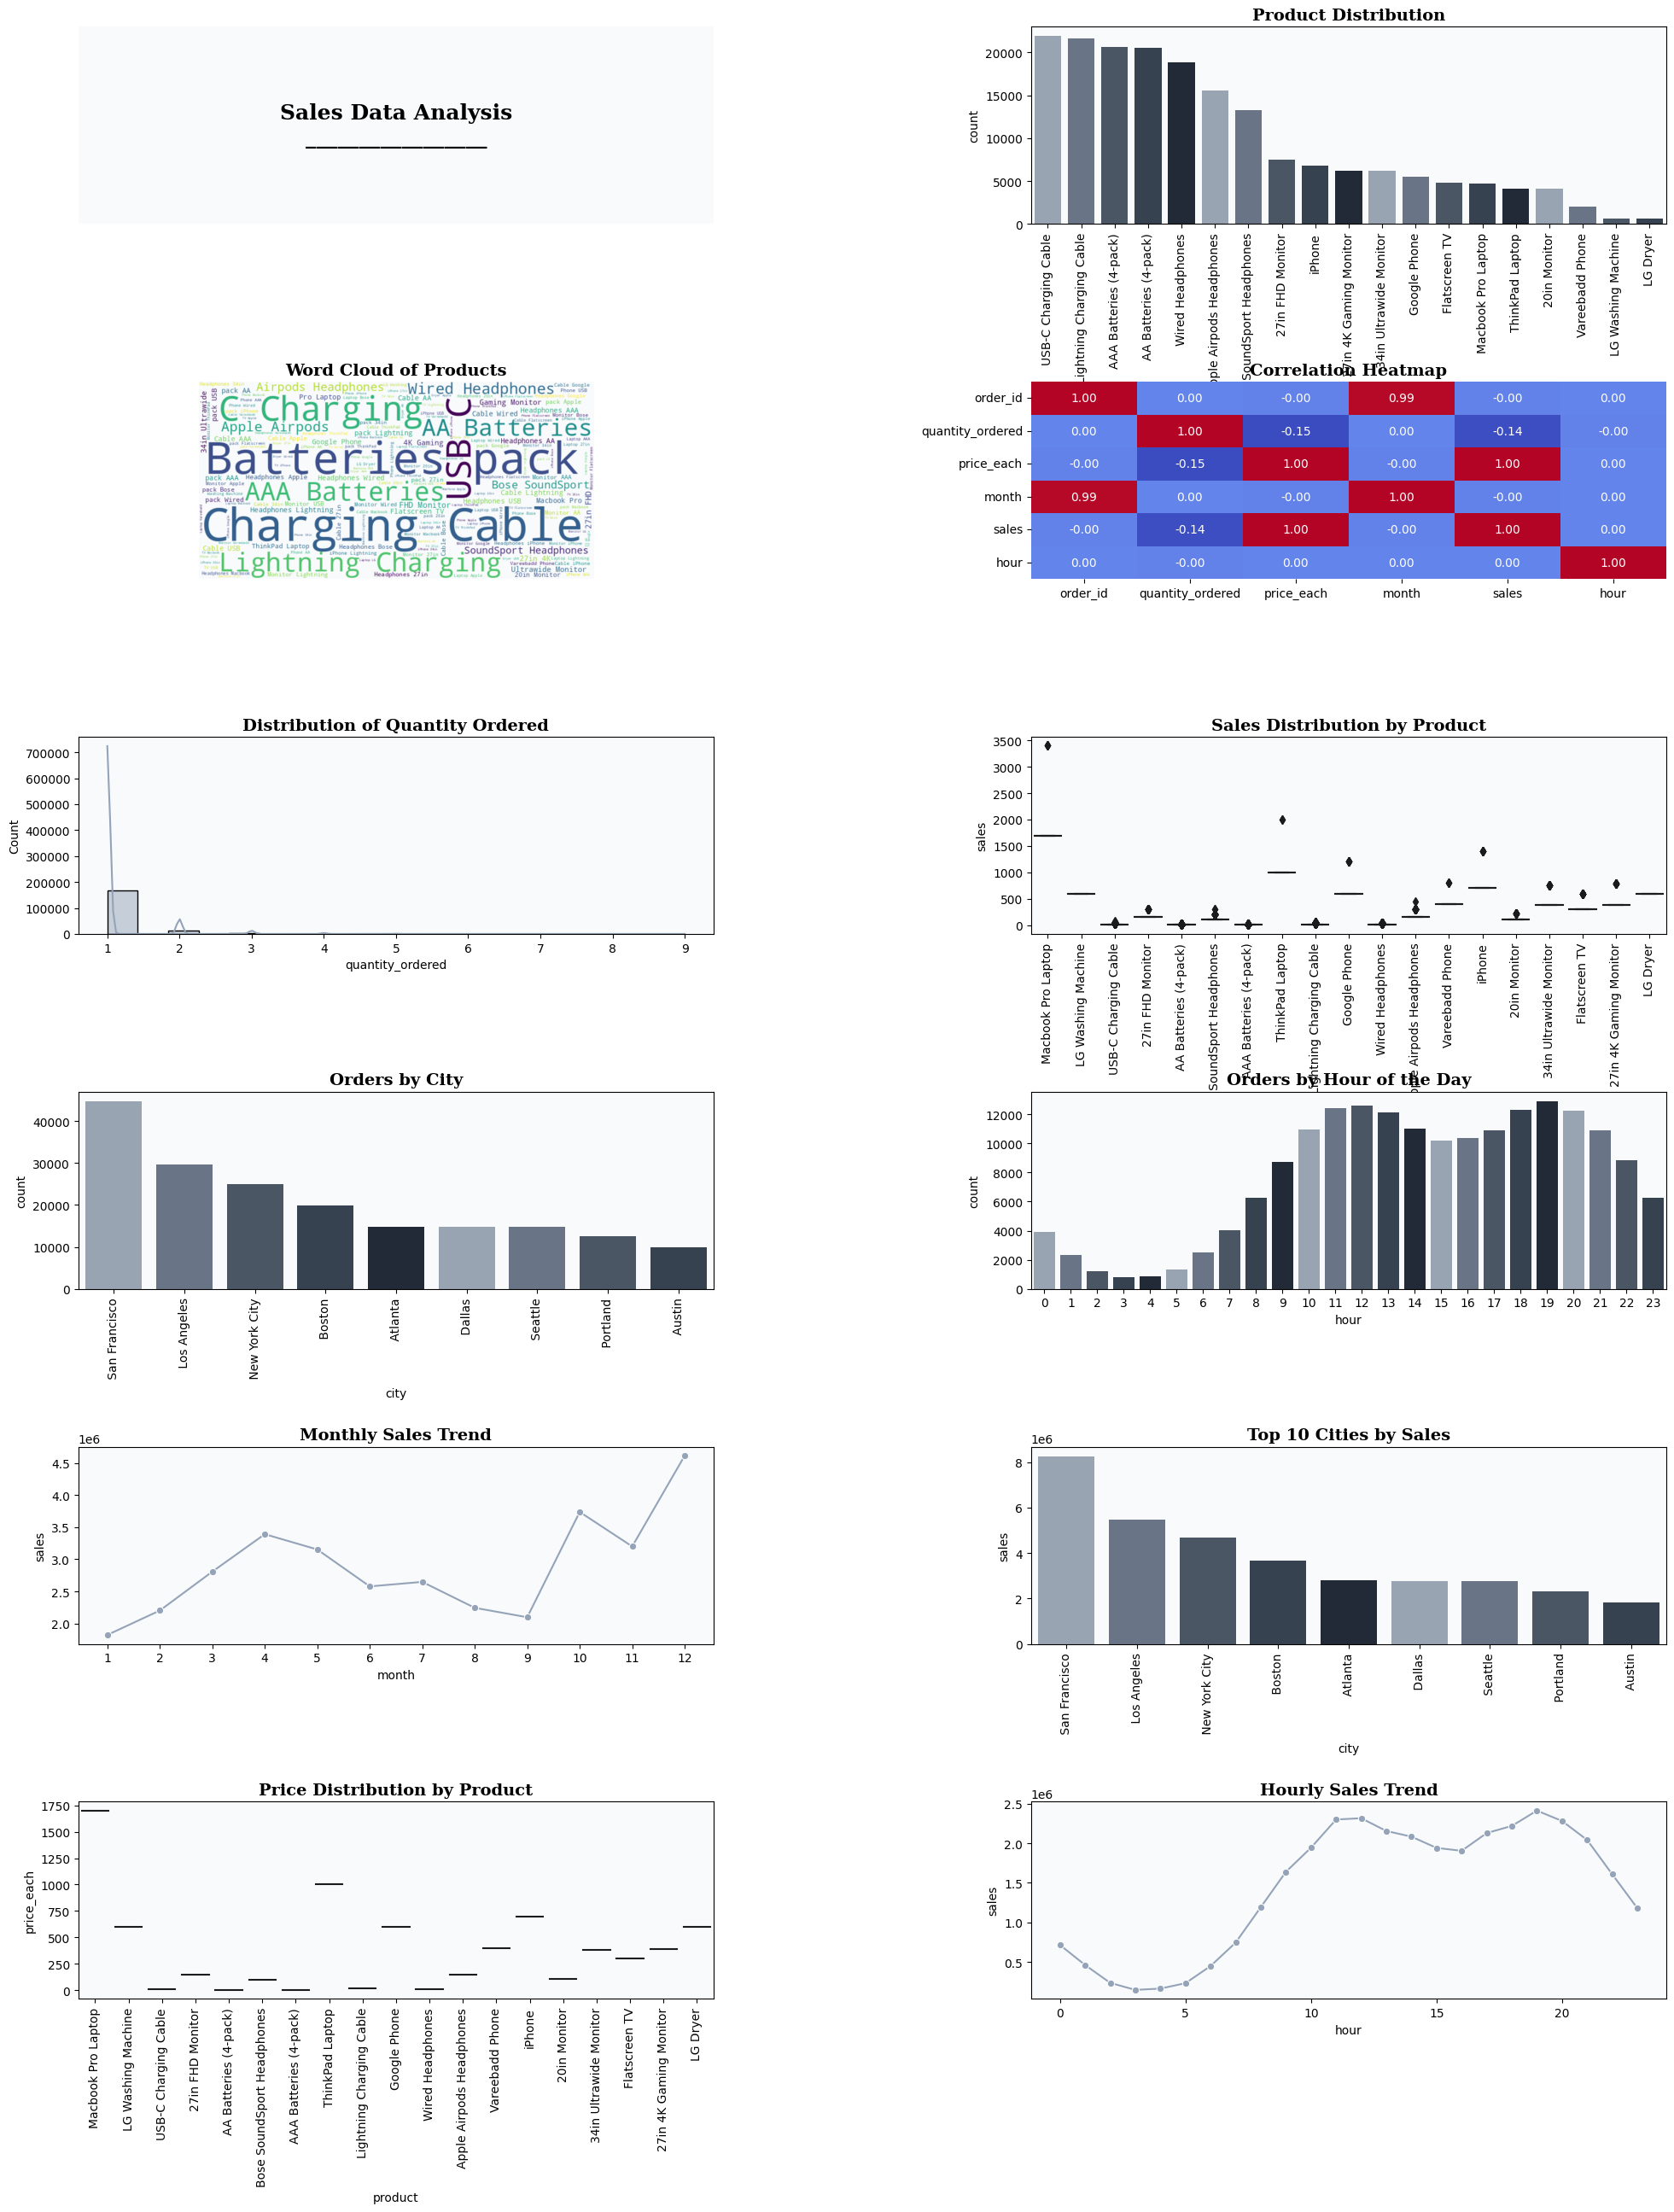

In [21]:
# General plot settings
background_color = "#f8fafc"  
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]  

# Adjust figure size and layout
fig = plt.figure(figsize=(24, 30))  
gs = fig.add_gridspec(6, 2)  
gs.update(wspace=0.5, hspace=0.8)  

# Create axes for subplots
axes = [fig.add_subplot(gs[i, j]) for i in range(6) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)  

# Title for the overall analysis
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Sales Data Analysis\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# 1. Count plot for product distribution
if 'product' in data.columns:
    sns.countplot(ax=axes[1], data=data, x='product', palette=color_palette, order=data['product'].value_counts().index)
    axes[1].set_title('Product Distribution', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# 2. Word cloud for most frequent words in product names
if 'product' in data.columns:
    text = " ".join(data['product'].astype(str))  # Combine all product names into a single string
    wordcloud = WordCloud(background_color=background_color, width=800, height=400).generate(text)
    axes[2].imshow(wordcloud, interpolation='bilinear')
    axes[2].axis('off')
    axes[2].set_title('Word Cloud of Products', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 3. Correlation heatmap for numeric data
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
if not numeric_data.empty:
    corr_matrix = numeric_data.corr()  # Calculate correlation matrix
    sns.heatmap(corr_matrix, ax=axes[3], annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
    axes[3].set_title('Correlation Heatmap', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 4. Distribution of quantity ordered
if 'quantity_ordered' in data.columns:
    sns.histplot(ax=axes[4], data=data, x='quantity_ordered', kde=True, color=color_palette[0])
    axes[4].set_title('Distribution of Quantity Ordered', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 5. Distribution of sales by product
if 'sales' in data.columns and 'product' in data.columns:
    sns.boxplot(ax=axes[5], data=data, x='product', y='sales', palette=color_palette)
    axes[5].set_title('Sales Distribution by Product', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[5].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# 6. Distribution of orders by city
if 'city' in data.columns:
    sns.countplot(ax=axes[6], data=data, x='city', palette=color_palette, order=data['city'].value_counts().index)
    axes[6].set_title('Orders by City', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[6].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# 7. Distribution of orders by hour of the day
if 'hour' in data.columns:
    sns.countplot(ax=axes[7], data=data, x='hour', palette=color_palette)
    axes[7].set_title('Orders by Hour of the Day', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 8. Monthly Sales Trend
if 'month' in data.columns and 'sales' in data.columns:
    monthly_sales = data.groupby('month')['sales'].sum().reset_index()
    sns.lineplot(ax=axes[8], data=monthly_sales, x='month', y='sales', marker='o', color=color_palette[0])
    axes[8].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[8].set_xticks(range(1, 13))  # Set x-ticks for each month

# 9. Top 10 Cities by Sales
if 'city' in data.columns and 'sales' in data.columns:
    top_cities = data.groupby('city')['sales'].sum().nlargest(10).reset_index()
    sns.barplot(ax=axes[9], data=top_cities, x='city', y='sales', palette=color_palette)
    axes[9].set_title('Top 10 Cities by Sales', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[9].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# 10. Price Distribution by Product
if 'price_each' in data.columns and 'product' in data.columns:
    sns.violinplot(ax=axes[10], data=data, x='product', y='price_each', palette=color_palette)
    axes[10].set_title('Price Distribution by Product', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[10].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# 11. Hourly Sales Trend
if 'hour' in data.columns and 'sales' in data.columns:
    hourly_sales = data.groupby('hour')['sales'].sum().reset_index()
    sns.lineplot(ax=axes[11], data=hourly_sales, x='hour', y='sales', marker='o', color=color_palette[0])
    axes[11].set_title('Hourly Sales Trend', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# Show the plots
plt.tight_layout()
plt.show()

### **Sales Data Analysis Report**

#### **1. Orders by City**
The data reveals the following ranking of cities by the number of orders:

1. **San Francisco**  
2. **Los Angeles**  
3. **New York City**  
4. **Boston**  
5. **Atlanta**  
6. **Dallas**  
7. **Seattle**  
8. **Portland**  
9. **Austin**  

**Insights**:
- **San Francisco** leads with the highest number of orders, followed by **Los Angeles** and **New York City**. These cities are likely major hubs for sales due to their large populations, high economic activity, and tech-savvy consumers.
- **Boston**, **Atlanta**, and **Dallas** also show significant order volumes, indicating strong market presence in these regions.
- Smaller cities like **Seattle**, **Portland**, and **Austin** have fewer orders, which could be due to their smaller population sizes or less market penetration.

**Recommendations**:
- Focus marketing efforts on the top-performing cities (San Francisco, Los Angeles, and New York City) to maximize sales.
- Investigate the reasons behind lower order volumes in smaller cities (Seattle, Portland, Austin, ... ) and explore strategies to boost sales, such as targeted promotions or partnerships with local retailers.

---

#### **2. Product Distribution**
The most popular products based on order volume are:

1. **USB-C Charging Cable**  
2. **Lightning Charging Cable**  
3. **AAA Batteries (4-pack)**  
4. **Wired Headphones**  
5. **Apple Airpods Headphones**  
6. **SoundSport Headphones**  
7. **27in FHD Monitor**  
8. **iPhone**  
9. **27in 4K Gaming Monitor**  
10. **34in Ultrawide Monitor**  

**Insights**:
- **Charging cables (USB-C and Lightning)** are the top-selling products, likely due to their universal utility and frequent need for replacement.
- **AAA Batteries (4-pack)** and **Wired Headphones** are also highly popular, suggesting strong demand for affordable, everyday accessories.
- **Apple Airpods** and **SoundSport Headphones** indicate a growing trend toward wireless audio solutions.
- Monitors (**27in FHD**, **27in 4K Gaming**, and **34in Ultrawide**) and **iPhone** represent higher-ticket items, showing demand for premium tech products.

**Recommendations**:
- Increase inventory and promotional efforts for high-demand products like **USB-C Charging Cables**, **Lightning Charging Cables**, and **AAA Batteries**.
- Explore bundling strategies (charging cables with headphones or monitors) to increase average order value.
- Invest in marketing campaigns for premium products like **Apple Airpods** and **4K Gaming Monitors** to target tech enthusiasts and professionals.

---

#### **3. Combined Analysis**
- **Geographic and Product Trends**: The top cities (San Francisco, Los Angeles, New York City) are likely driving sales for both high-demand accessories (charging cables, batteries) and premium products (monitors, iPhones). This suggests that these cities have a mix of tech-savvy consumers and professionals willing to invest in high-quality tech products.
- **Opportunities for Growth**: Smaller cities like Austin and Portland may have untapped potential for premium products, especially if targeted with localized marketing campaigns.

*This analysis provides actionable insights to optimize sales strategies, improve inventory management, and target high-potential markets effectively.*

Gradient Boosting Regressor Metrics:
  - Mean Squared Error (MSE): 1.117413
  - R-squared (R2): 0.999990


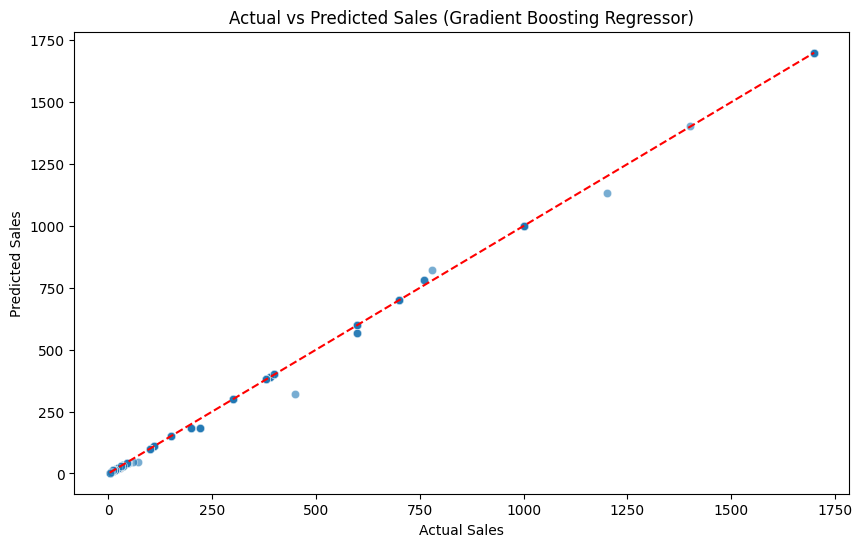

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 148760, number of used features: 32
[LightGBM] [Info] Start training from score 185.212745
LightGBM Regressor Metrics:
  - Mean Squared Error (MSE): 4.119205
  - R-squared (R2): 0.999963


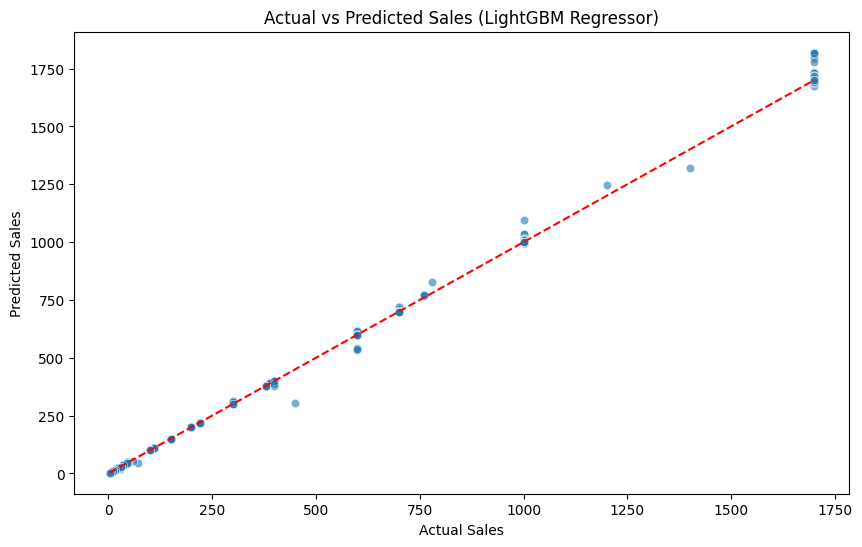

Neural Network Regressor Metrics:
  - Mean Squared Error (MSE): 0.541611
  - R-squared (R2): 0.999995


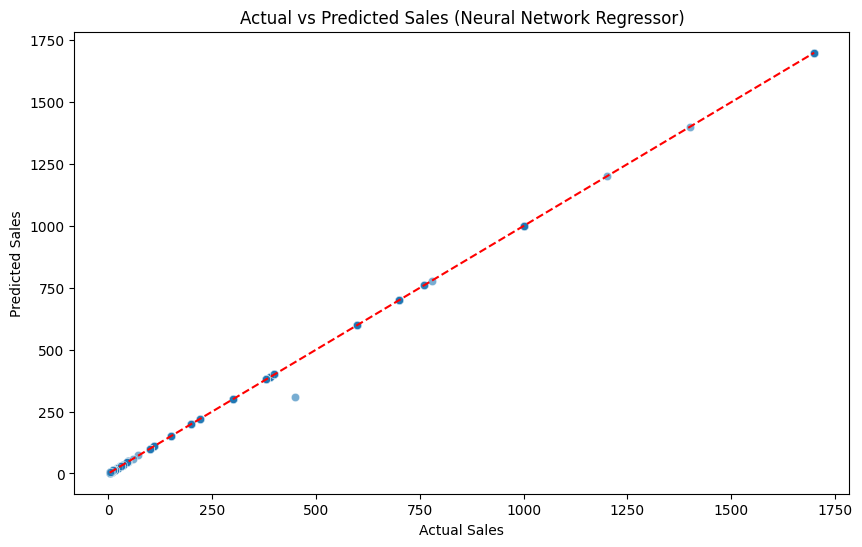

Gradient Boosting Regressor Cross-Validation:
  - Mean Squared Error (MSE): 4.092633 (+/- 5.528531)
  - R-squared (R2): 0.999963 (+/- 0.000050)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 148760, number of used features: 32
[LightGBM] [Info] Start training from score 185.687685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 148760, number of used features: 32
[LightGBM] [Info] Start training from score 185.676503
[LightGBM] [Info] Auto-choosing row-wise

In [24]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate regression models
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"{model_name} Metrics:")
    print(f"  - Mean Squared Error (MSE): {mse:.6f}")
    print(f"  - R-squared (R2): {r2:.6f}")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs Predicted Sales ({model_name})')
    plt.show()

# Step 1: Preprocess the data
# Define categorical and numerical features
categorical_features = ['product', 'city']
numerical_features = ['quantity_ordered', 'price_each', 'month', 'hour']

# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
    ])

# Apply the preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Step 2: Train and evaluate models
# Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(random_state=42)
evaluate_regression_model(gbm_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "Gradient Boosting Regressor")

# LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)
evaluate_regression_model(lgb_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "LightGBM Regressor")

# Neural Network Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
evaluate_regression_model(mlp_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "Neural Network Regressor")

# Step 3: Compare models using cross-validation
models = {
    "Gradient Boosting Regressor": gbm_model,
    "LightGBM Regressor": lgb_model,
    "Neural Network Regressor": mlp_model
}

for name, model in models.items():
    # Perform cross-validation
    cv_scores_mse = -cross_val_score(model, preprocessor.transform(X), y, cv=5, scoring='neg_mean_squared_error')
    cv_scores_r2 = cross_val_score(model, preprocessor.transform(X), y, cv=5, scoring='r2')
    
    # Print cross-validation results
    print(f"{name} Cross-Validation:")
    print(f"  - Mean Squared Error (MSE): {cv_scores_mse.mean():.6f} (+/- {cv_scores_mse.std():.6f})")
    print(f"  - R-squared (R2): {cv_scores_r2.mean():.6f} (+/- {cv_scores_r2.std():.6f})")